# About

These is a base solution of PID.

In [1]:
%matplotlib inline
import random
import pandas
import numpy
import cPickle as pickle
import matplotlib.pyplot as plt

import root_numpy
from sklearn.metrics import roc_auc_score, roc_curve

# Directories

In [2]:
data_path = "../../../data/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/\
GhostAccFrac1.0/TMVA-Run2-NoTkLikCD/Long"

# Read data

In [64]:
particle_pdg_codes = {"all": 999999,
                    "Ghost": 0,
                    "Electron": 11,
                    "Muon": 13,
                    "Pion": 211,
                    "Kaon": 321,
                    "Proton": 2212}

particles = ["Ghost", "Electron", "Muon", "Pion", "Kaon", "Proton"]
labs = [0, 1, 2, 3, 4, 5]

In [65]:
data = pandas.read_csv(data_path + "/data_train.csv")

In [66]:
mc_p_type = numpy.abs(data.MCParticleType.values)
labels = numpy.zeros(len(mc_p_type))

for one_particle, one_lab in zip(particles, labs):
    
    pdg = particle_pdg_codes[one_particle]
    labels += one_lab * (mc_p_type == pdg)
    
numpy.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.])

# Balance data

In [67]:
for i in numpy.unique(labels):
    print "Size of class %d is " % i, (labels == i).sum()

Size of class 0 is  170119
Size of class 1 is  5610
Size of class 2 is  29839
Size of class 3 is  774220
Size of class 4 is  138261
Size of class 5 is  81951


In [68]:
selected_indexes = []

numpy.random.seed = 42

for i in numpy.unique(labels):
    
    indxs = numpy.random.choice(data.index[labels == i], 
                                size=min(5000, len(labels[labels == i])), 
                                replace=False)
    
    selected_indexes += list(indxs)

In [69]:
data.loc[selected_indexes].to_csv(data_path + "/data_train_balanced.csv")

# Read balanced data

In [70]:
data = pandas.read_csv(data_path + "/data_train_balanced.csv")

In [71]:
mc_p_type = numpy.abs(data.MCParticleType.values)
labels = numpy.zeros(len(mc_p_type))

for one_particle, one_lab in zip(particles, labs):
    
    pdg = particle_pdg_codes[one_particle]
    labels += one_lab * (mc_p_type == pdg)
    
numpy.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.])

In [72]:
for i in numpy.unique(labels):
    print "Size of class %d is " % i, (labels == i).sum()

Size of class 0 is  5000
Size of class 1 is  5000
Size of class 2 is  5000
Size of class 3 is  5000
Size of class 4 is  5000
Size of class 5 is  5000


# Features

In [73]:
features = [
 'BremPIDe',
 'CaloNeutralPrs',
 'CaloNeutralSpd',
 'InAccBrem',
 'InAccSpd',
 'CaloPrsE',
 'InAccPrs',
 'HcalPIDe',
 'CaloHcalE',
 'InAccHcal',
 'CaloTrajectoryL',
 'EcalPIDe',
 'CaloNeutralEcal',
 'CaloTrMatch',
 'CaloElectronMatch',
 'CaloChargedPrs',
 'CaloChargedSpd',
 'MuonNShared',
 'CaloBremMatch',
 'MuonIsLooseMuon',
 'MuonIsMuon',
 'MuonBkgLL',
 'InAccEcal',
 'MuonMuLL',
 #'TrackMatchChi2', # all missing values
 'TrackGhostProbability',
 'TrackType',
 'EcalPIDmu',
 'TrackPt',
 'TrackP',
 'RichAboveMuThres',
 'InAccMuon',
 'TrackChi2PerDof',
 'TrackNumDof',
 'CombDLLmu',
 'CaloSpdE',
 'PrsPIDe',
 'HcalPIDmu',
 'TrackFitMatchChi2',
 'CombDLLpi',
 'RichDLLbt',
 'TrackHistory',
 'RichDLLpi',
 'TrackFitVeloNDoF',
 'CombDLLp',
 'TrackFitTChi2',
 'TrackFitTNDoF',
 'RichAboveElThres',
 'TrackDOCA',
 'RichDLLe',
 'CombDLLe',
 'CombDLLk',
 'TrackFitVeloChi2',
 'RichDLLp',
 'RichUsedR1Gas',
 'RichUsedR2Gas',
 'CaloEcalE',
 'RichAbovePiThres',
 'CaloChargedEcal',
 'RichAboveKaThres',
 'RichAbovePrThres',
 'RichDLLmu',
 'RichDLLk']
#  'piplus_OWNPV_X',
#  'piplus_OWNPV_Y',
#  'piplus_OWNPV_Z',
#  'piplus_OWNPV_XERR',
#  'piplus_OWNPV_YERR',
#  'piplus_OWNPV_ZERR',
#  'piplus_OWNPV_CHI2',
#  'piplus_OWNPV_NDOF',
#  'piplus_IP_OWNPV',
#  'piplus_IPCHI2_OWNPV']

In [8]:
len(features)

62

# Feature histograms

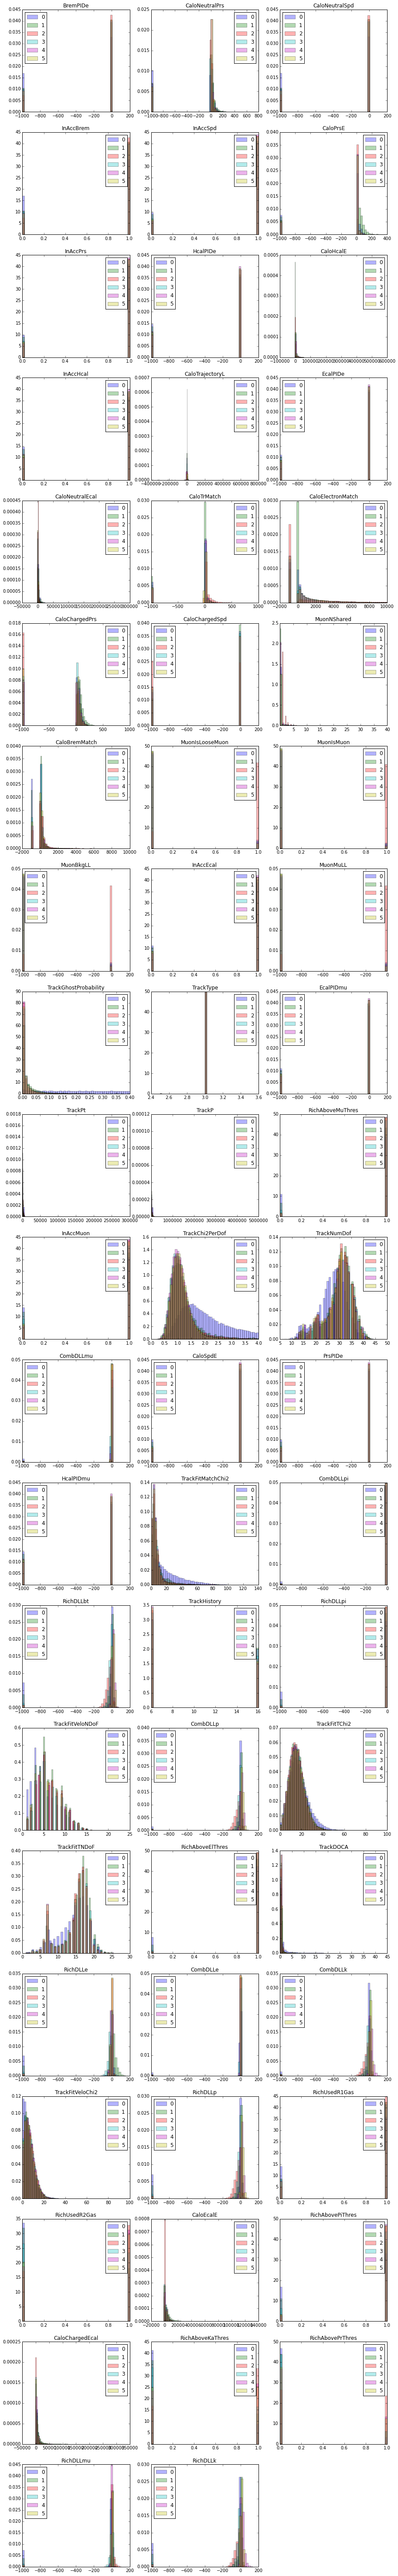

In [16]:
i=0
plt.figure(figsize=(15, 5 * (len(features)//3 + 1)))

for f in features:
    
    fval = data[f].values
    plt.subplot(len(features)//3 + 1, 3, i+1)
    plt.title(f)
    plt.hist(fval[labels==0],label='0', bins=50, alpha=0.3, normed=True)
    plt.hist(fval[labels==1],label='1', bins=50, alpha=0.3, normed=True)
    plt.hist(fval[labels==2],label='2', bins=50, alpha=0.3, normed=True)
    plt.hist(fval[labels==3],label='3', bins=50, alpha=0.3, normed=True)
    plt.hist(fval[labels==4],label='4', bins=50, alpha=0.3, normed=True)
    plt.hist(fval[labels==5],label='5', bins=50, alpha=0.3, normed=True)
    plt.legend(loc='best')
    
    i+=1
    
plt.show()

# Preprocessing

In [17]:
from sklearn.preprocessing import MinMaxScaler, Imputer, StandardScaler

class Preprocessor(object):
    
    def __init__(self, features, missing_values, with_missing_masks=True, copy=True):
        self.features = features
        self.missing_values = missing_values
        self.with_missing_masks = with_missing_masks
        self.copy = copy
        
    def fit(self, data):
        
        self.ss_dict = {}
        self.imputer_dict = {}
        self.mms_dict = {}
        
        for f in self.features:
            
            feature_value = data[f].values.reshape((-1, 1))
            feature_non_missing = feature_value[feature_value != self.missing_values].reshape((-1, 1))
            
            if len(feature_non_missing) == 0:
                print f + ' has all missing values.'
                
            imputer = Imputer(missing_values=self.missing_values, strategy='median', axis=0, copy=False)
            imputer.fit(feature_non_missing)
            self.imputer_dict[f] = imputer
                
            mms = MinMaxScaler(feature_range=(0, 100), copy=False)
            mms.fit(feature_non_missing)
            self.mms_dict[f] = mms
            feature_non_missing = mms.transform(feature_non_missing)
            sing = (feature_non_missing > 0) * 2. - 1.
            feature_non_missing = numpy.log(1. + numpy.abs(feature_non_missing)) * sing
            #feature_non_missing = 1./feature_non_missing
            
            ss = StandardScaler(copy=False, with_mean=True, with_std=True)
            ss.fit(feature_non_missing)
            self.ss_dict[f] = ss
            
    def transform(self, data):
        
        if self.copy == True:
            input_data = data.copy()
        else:
            input_data = data
        
        self.new_features = []
        
        for f in self.features:
            
            feature_value = input_data[f].values.reshape((-1, 1))
            missing_mask = (feature_value != self.missing_values) * 1.
            
            feature_value = self.imputer_dict[f].transform(feature_value)
            
            feature_value = self.mms_dict[f].transform(feature_value)
            sing = (feature_value > 0) * 2. - 1.
            feature_value = numpy.log(1. + numpy.abs(feature_value)) * sing
            #feature_value = 1./feature_value
            
            feature_value = self.ss_dict[f].transform(feature_value)
            
            input_data[f] = feature_value.reshape(-1)
            if (self.with_missing_masks == True) and (missing_mask.sum() != len(missing_mask)):
                input_data[f + 'not_missing'] = missing_mask
                self.new_features += [f + 'not_missing']
                
        return input_data[features + self.new_features]

In [74]:
prep = Preprocessor(features=features, missing_values=-999., with_missing_masks=True, copy=True)
prep.fit(data)

In [75]:
output = prep.transform(data)

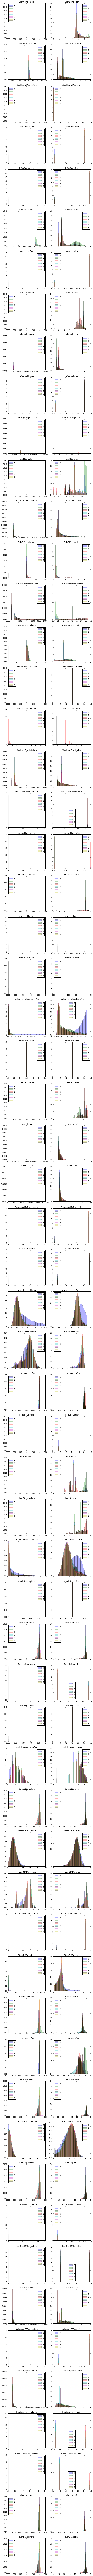

In [20]:
i = 1
plt.figure(figsize=(10, 5 * len(features)))

for f in features:
    
    plt.subplot(len(features),2,i)
    plt.title(f + ' before')
    plt.hist(data[f].values[labels==0],label='0', bins=50, alpha=0.3, normed=True)
    plt.hist(data[f].values[labels==1],label='1', bins=50, alpha=0.3, normed=True)
    plt.hist(data[f].values[labels==2],label='2', bins=50, alpha=0.3, normed=True)
    plt.hist(data[f].values[labels==3],label='3', bins=50, alpha=0.3, normed=True)
    plt.hist(data[f].values[labels==4],label='4', bins=50, alpha=0.3, normed=True)
    plt.hist(data[f].values[labels==5],label='5', bins=50, alpha=0.3, normed=True)
    plt.legend(loc='best')
    
    plt.subplot(len(features),2,i+1)
    plt.title(f + ' after')
    plt.hist(output[f].values[labels==0],label='0', bins=50, alpha=0.3, normed=True)
    plt.hist(output[f].values[labels==1],label='1', bins=50, alpha=0.3, normed=True)
    plt.hist(output[f].values[labels==2],label='2', bins=50, alpha=0.3, normed=True)
    plt.hist(output[f].values[labels==3],label='3', bins=50, alpha=0.3, normed=True)
    plt.hist(output[f].values[labels==4],label='4', bins=50, alpha=0.3, normed=True)
    plt.hist(output[f].values[labels==5],label='5', bins=50, alpha=0.3, normed=True)
    plt.legend(loc='best')
    
    i += 2
    
plt.show()

# PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(output[features].values)
X_r = pca.transform(output[features].values)

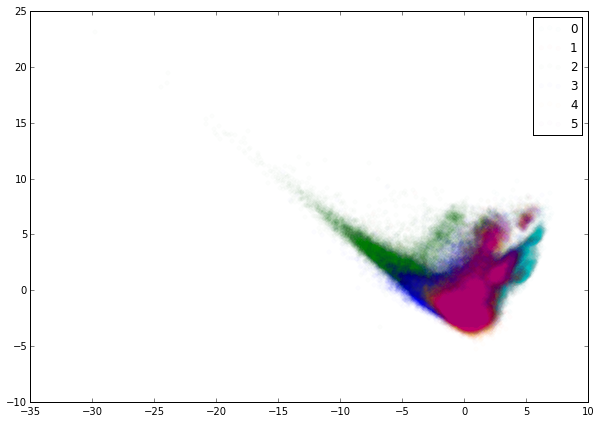

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(X_r[labels==0, 0], X_r[labels==0, 1], label='0', alpha=0.01, color='c')
plt.scatter(X_r[labels==1, 0], X_r[labels==1, 1], label='1', alpha=0.01, color='r')
plt.scatter(X_r[labels==2, 0], X_r[labels==2, 1], label='2', alpha=0.01, color='g')
plt.scatter(X_r[labels==3, 0], X_r[labels==3, 1], label='3', alpha=0.01, color='b')
plt.scatter(X_r[labels==4, 0], X_r[labels==4, 1], label='4', alpha=0.01, color='gold')
plt.scatter(X_r[labels==5, 0], X_r[labels==5, 1], label='5', alpha=0.01, color='m')
plt.legend(loc='best')
plt.show()

In [76]:
weights = numpy.zeros(len(labels))

for one_lab in labs:
    
    weights += 0.1 * (labels == one_lab) * len(labels) / ((labels == one_lab).sum())
    
numpy.unique(weights)

array([ 0.6])

In [77]:
for i in numpy.unique(labels):
    print "Weight of class %d is " % i, weights[labels == i][0]

Weight of class 0 is  0.6
Weight of class 1 is  0.6
Weight of class 2 is  0.6
Weight of class 3 is  0.6
Weight of class 4 is  0.6
Weight of class 5 is  0.6


In [78]:
from sklearn.cross_validation import train_test_split

train_inds, test_inds, labels_train, labels_test, weights_train, weights_test = train_test_split(data.index, 
                                                                                                 labels, 
                                                                                                 weights, 
                                                                                                 test_size=0.25, 
                                                                                                 random_state=42)

In [117]:
from keras.utils import np_utils

X_train = prep.transform(data.loc[train_inds])
y_train = (labels_train==5)*1.

X_test = prep.transform(data.loc[test_inds])
y_test = (labels_test==5)*1

In [ ]:
from rep.estimators import XGBoostClassifier
from sklearn.metrics import log_loss

logloss = []
ndim = []


for one_ndim in range(2, len(features)+1, 2):
    
    print one_ndim

    pca = PCA(n_components=one_ndim)
    pca.fit(X_train[features].values)
    X_train_r = pca.transform(X_train[features].values)
    X_test_r = pca.transform(X_test[features].values)

    clf = XGBoostClassifier(n_estimators=100, 
                            colsample=0.7, 
                            eta=0.1, 
                            nthreads=4, 
                            subsample=0.5, 
                            max_depth=8,
                            min_child_weight = 50)

    clf.fit(X_train_r, y_train, sample_weight=weights_train)
    
    probas = clf.predict_proba(X_test_r)
    
    one_logloss = log_loss(y_test, probas)
    
    logloss.append(one_logloss)
    ndim.append(one_ndim)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32

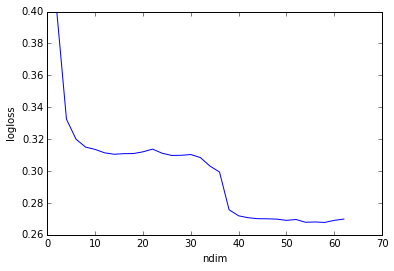

In [120]:
plt.plot(ndim, logloss)
plt.xlabel('ndim')
plt.ylabel('logloss')
plt.show()

# Train Keras

In [121]:
weights = numpy.zeros(len(labels))

for one_lab in labs:
    
    weights += 0.1 * (labels == one_lab) * len(labels) / ((labels == one_lab).sum())
    
numpy.unique(weights)

array([ 0.6])

In [122]:
for i in numpy.unique(labels):
    print "Weight of class %d is " % i, weights[labels == i][0]

Weight of class 0 is  0.6
Weight of class 1 is  0.6
Weight of class 2 is  0.6
Weight of class 3 is  0.6
Weight of class 4 is  0.6
Weight of class 5 is  0.6


In [123]:
from sklearn.cross_validation import train_test_split

train_inds, test_inds, labels_train, labels_test, weights_train, weights_test = train_test_split(data.index, 
                                                                                                 labels, 
                                                                                                 weights, 
                                                                                                 test_size=0.25, 
                                                                                                 random_state=42)

In [124]:
from keras.utils import np_utils

X_train = prep.transform(data.loc[train_inds]).values
y_train = (labels_train==5) * 1.

X_test = prep.transform(data.loc[test_inds]).values
y_test = (labels_test==5) * 1.

In [125]:
int(len(features + prep.new_features))

95

In [129]:
%%time
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adadelta
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, activity_l2, l1, activity_l1, l1l2

clf = Sequential()
clf.add(Dense(1, input_dim=len(features + prep.new_features), init='uniform', activation='sigmoid'))
clf.add(Dense(1, init='uniform', activation='sigmoid'))

sgd = SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)

clf.compile(loss='binary_crossentropy',
              optimizer=sgd,
             class_mode = "binary")

call = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='auto')


history = clf.fit(X=X_train, 
                y=y_train, 
                #sample_weight=weights_train,
                nb_epoch=700,
                batch_size=100,
                show_accuracy=True,
                validation_split=0.1,
                validation_data = (X_test, y_test),
                verbose=0,
                callbacks=[call])

In [130]:
val_loss[-1]

0.31212571263313293

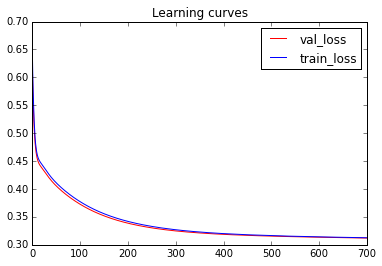

In [127]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.title('Learning curves')
plt.plot(val_loss, 'r', label='val_loss')
plt.plot(loss, 'b', label='train_loss')
plt.legend(loc='best')
plt.show()

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adadelta
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, activity_l2, l1, activity_l1, l1l2


def nn_fit_predict_logloss(n_neurons):
    clf = Sequential()
    clf.add(Dense(n_neurons, input_dim=len(features + prep.new_features), init='uniform', activation='sigmoid'))
    clf.add(Dense(1, init='uniform', activation='sigmoid'))

    sgd = SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)

    clf.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                 class_mode = "binary")

    call = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='auto')


    history = clf.fit(X=X_train, 
                    y=y_train, 
                    #sample_weight=weights_train,
                    nb_epoch=700,
                    batch_size=100,
                    show_accuracy=True,
                    validation_split=0.1,
                    validation_data = (X_test, y_test),
                    verbose=0,
                    callbacks=[call])
    
    return history.history['val_loss'][-1]

In [140]:
logloss = []
n_neurons = []

for n in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    
    one_logloss = nn_fit_predict_logloss(n)
    
    logloss.append(one_logloss)
    n_neurons.append(n)
    print n

1
2
3
4
5
10
20
50
100


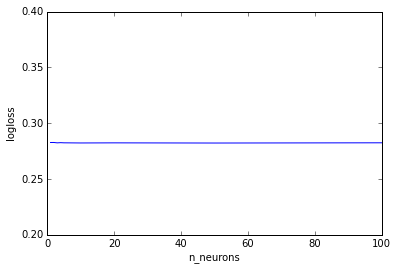

In [142]:
plt.plot(n_neurons, logloss)
plt.xlabel('n_neurons')
plt.ylabel('logloss')
plt.ylim(0.2, 0.4)
plt.show()